In [1]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local/fastai-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip freeze|grep fast

fastai==2.7.10
fastcore==1.5.27
fastdownload==0.0.7
fastjsonschema==2.16.2
fastprogress==1.0.3


In [3]:
# uncomment this if the dataset is downloaded for the first time in your machine
# path = untar_data(URLs.PETS)
# path = path/'images'

In [4]:
path = Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images')

In [5]:
path.ls()

(#7393) [Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [36]:
# mps_device = torch.device("mps")
mps_device = torch.device("cpu")

In [37]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192),
    device=mps_device)

In [38]:
dls.device

device(type='cpu')

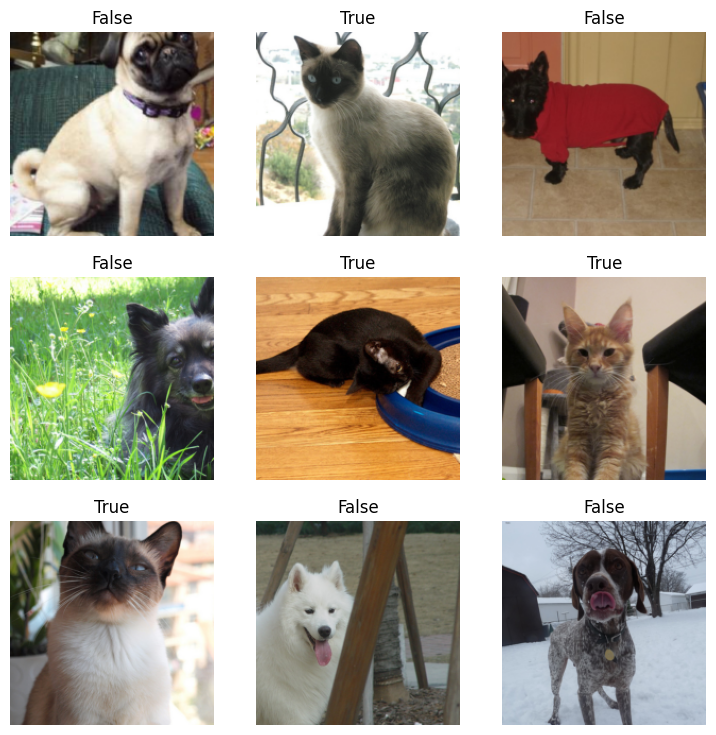

In [39]:
dls.show_batch()

In [40]:
import os; print(os.environ)

environ({'TERM_SESSION_ID': 'w0t0p0:777196CA-AE8E-4CCD-A01B-21DDF78F9A61', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.B9VBBgKQwC/Listeners', 'LC_TERMINAL_VERSION': '3.4.15', 'COLORFGBG': '7;0', 'ITERM_PROFILE': 'Default', 'XPC_FLAGS': '0x0', 'PWD': '/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local', 'SHELL': '/bin/zsh', '__CFBundleIdentifier': 'com.googlecode.iterm2', 'SECURITYSESSIONID': '186a5', 'LC_CTYPE': 'UTF-8', 'TERM_PROGRAM_VERSION': '3.4.15', 'TERM_PROGRAM': 'iTerm.app', 'PATH': '/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local/fastai-venv/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/homebrew/bin', 'LC_TERMINAL': 'iTerm2', 'COLORTERM': 'truecolor', 'COMMAND_MODE': 'unix2003', 'TERM': 'xterm-color', 'HOME': '/Users/muniyarajs', 'TMPDIR': '/var/folders/cn/ll75z8d518j72zm_n0j8pq0w0000gn/T/', 'USER': 'muniyarajs', 'XPC_SERVICE_NAME': '0', 'LOGNAME': 'muniyarajs', 'LaunchInstanceID': '9A7B5E03-0D44-4AE5-BBCB-0

In [41]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.to(mps_device)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.196975,0.049491,0.017591,05:28


epoch,train_loss,valid_loss,error_rate,time
0,0.077762,0.039460,0.014208,05:34
1,0.039699,0.023727,0.009472,05:35
2,0.016527,0.023213,0.009472,05:35


In [42]:
files = get_image_files(path)
len(files)



7390

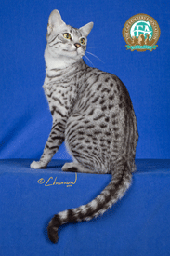

In [43]:
Image.open(files[0]).to_thumb(256,256)

In [44]:

print(f'{files[0]} is predicted as {learn.predict(files[0])}')

for i in range(10):
  print(f'{files[i]} is predicted as {learn.predict(files[i])}')

/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg is predicted as ('True', TensorBase(1), TensorBase([1.2913e-09, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg is predicted as ('True', TensorBase(1), TensorBase([1.2913e-09, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/pug_52.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9953e-01, 4.6872e-04]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 6.5246e-06]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg is predicted as ('True', TensorBase(1), TensorBase([8.4534e-13, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9986e-01, 1.4403e-04]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg is predicted as ('True', TensorBase(1), TensorBase([4.5530e-11, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg is predicted as ('True', TensorBase(1), TensorBase([1.9300e-14, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 1.0985e-05]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg is predicted as ('True', TensorBase(1), TensorBase([1.5934e-14, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.8735e-06]))


In [45]:
#export model
learn.export('cat_model.pkl')

In [46]:
learn_inf = load_learner('cat_model.pkl')

for i in range(10):
  print(f'{files[i]} is predicted as {learn_inf.predict(files[i])}')

/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg is predicted as ('True', TensorBase(1), TensorBase([1.2913e-09, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/pug_52.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9953e-01, 4.6872e-04]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 6.5246e-06]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg is predicted as ('True', TensorBase(1), TensorBase([8.4534e-13, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9986e-01, 1.4403e-04]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg is predicted as ('True', TensorBase(1), TensorBase([4.5530e-11, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg is predicted as ('True', TensorBase(1), TensorBase([1.9300e-14, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 1.0985e-05]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg is predicted as ('True', TensorBase(1), TensorBase([1.5934e-14, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.8735e-06]))
